# CSE 6367 
# Programming Assignment 3 (P3)

## Eigenfaces (100 points)

### Task1 (30 points)
1. Load all the 25 images in the "/Eigenfaces/Train"
2. Display all the original faces in a 5X5 grid. Resize the images to 100X100 pixels for display only.
3. Find the mean face image. Perform PCA on the training faces.
4. Display the mean face. Resize the mean face to 100X100 pixels for display only
5. Diplay all the eigenfaces in a 5X5 grid.

#------------------------------Train images---------------------------------#


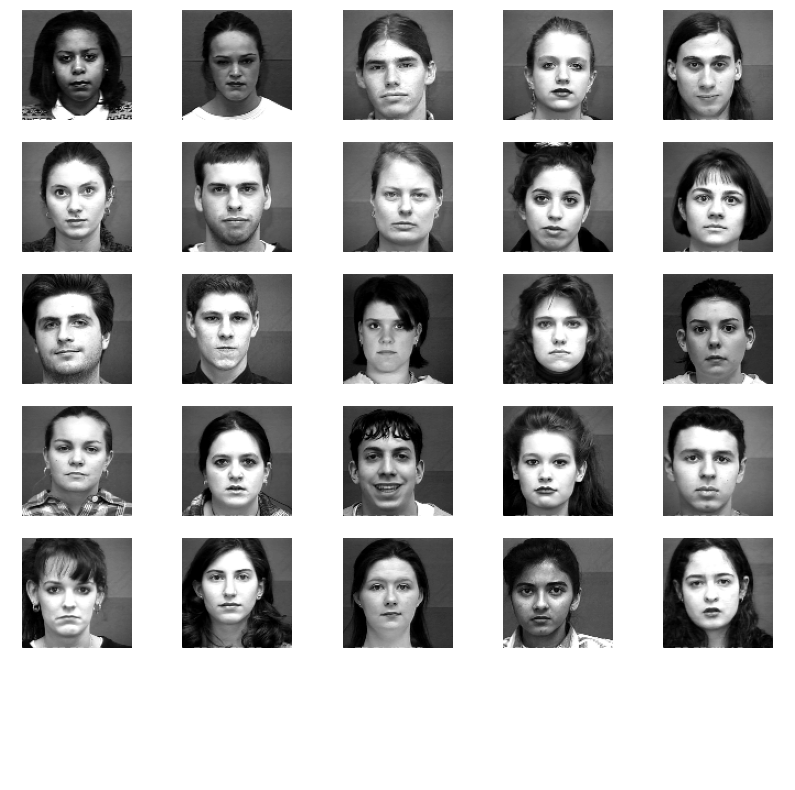

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def img_folder(folder):
    images = []
    filenames = os.listdir(folder)
    idx = 0
    while idx < len(filenames):
        img = cv2.imread(os.path.join(folder, filenames[idx]), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
        idx += 1
    return images

def resize_images(images, size=(100, 100)):
    resized_images = []
    idx = 0
    while idx < len(images):
        resized_images.append(cv2.resize(images[idx], size))
        idx += 1
    return resized_images

def display_images(images, rows, cols, titles=None, figsize=(10, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    idx = 0
    while idx < len(images):
        image_resized = cv2.resize(images[idx], (100, 100), interpolation=cv2.INTER_LINEAR)
        ax = axes.flatten()[idx]
        ax.imshow(image_resized, cmap='gray')
        ax.axis('off')
        if titles:
            ax.set_title(titles[idx])
        idx += 1
    while idx < rows * cols:
        axes.flatten()[idx].axis('off')
        idx += 1
    plt.show()

# Read the images without resizing them
train_folder = "Eigenfaces/Train"
train_images = img_folder(train_folder)

num_images = len(train_images)
data_matrix = np.array([img.flatten() for img in train_images])

# Compute the mean face
mean_face = np.mean(data_matrix, axis=0).reshape(425, 425)

# Subtract the mean face from each image
mean_centered_data = data_matrix - mean_face.flatten()

# Use PCA from scikit-learn to calculate eigenvalues and eigenvectors
pca = PCA(n_components=25)  # You can choose any desired number of eigenfaces
pca.fit(mean_centered_data)

# Get the eigenvalues and eigenvectors from PCA
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
# Obtain eigenfaces from the eigenvectors
eigenfaces = eigenvectors.reshape((-1, 425, 425))

print("#------------------------------Train images---------------------------------#")
display_images(train_images, 6, 5)

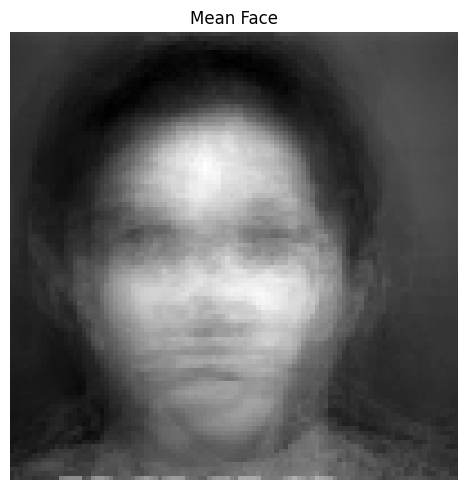

In [14]:
def display_single_image(image, title='', figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Display the mean face
display_single_image(cv2.resize(mean_face, (100,100)), title='Mean Face')

#-------------------------------eigen faces------------------------------------#


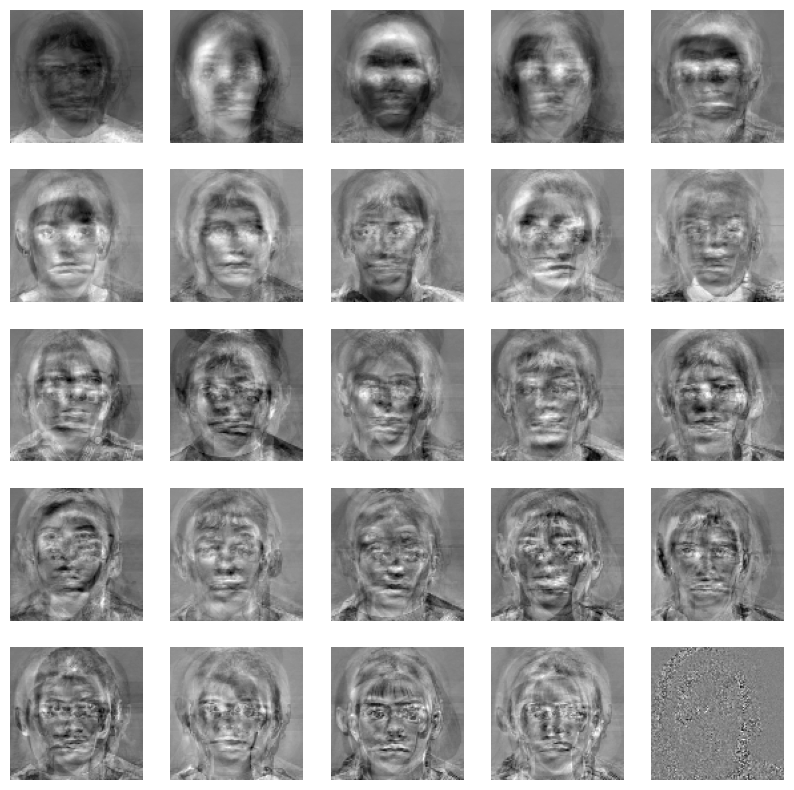

In [15]:
# Display eigenfaces in a 5x5 grid
print("#-------------------------------eigen faces------------------------------------#")
display_images(eigenfaces, 5, 5, figsize=(10, 10))


### Task2 (30 points)

1. Select k = 2 eigenfaces (eigenvectors that correspond to the largest eigenvalues).
2. Reconstruct the training faces and display the reconstructed faces in a 5X5 grid.
3. Repeat the process for k = 5 and k = 15. For each k, reconstruct the training faces and display the reconstructed image in a 5X5 grid.

#-------------------------Using Train Images------------------------------#-
#---------------------- 2 ---------------------------------#


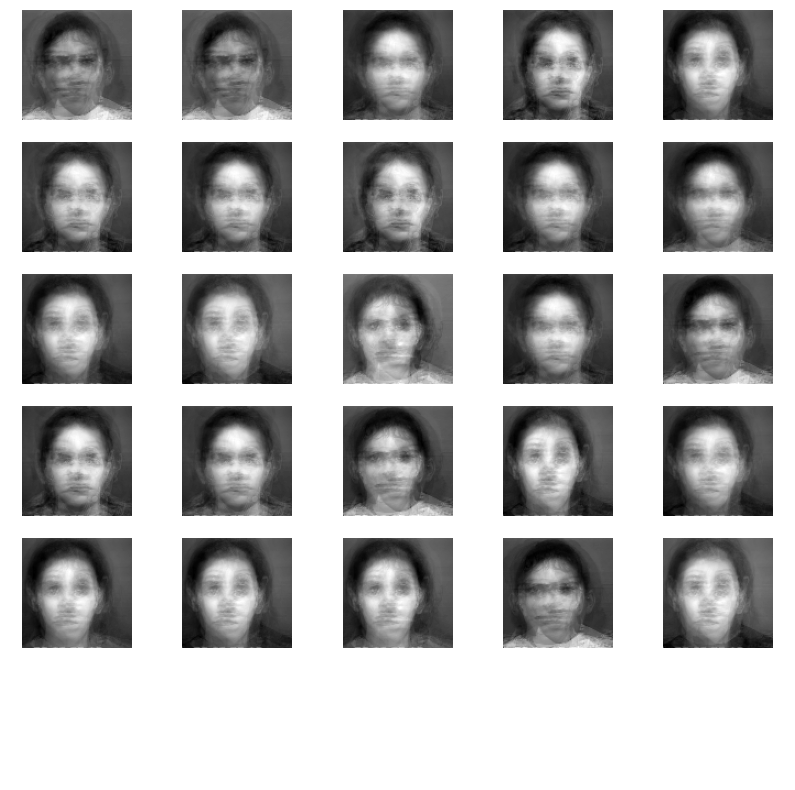

#---------------------- 5 ---------------------------------#


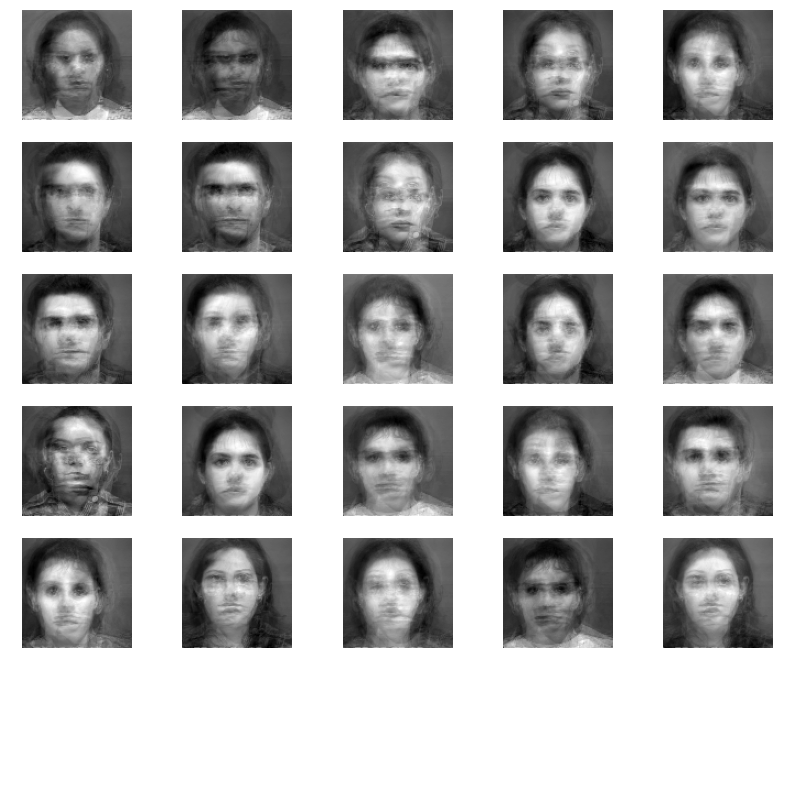

#---------------------- 15 ---------------------------------#


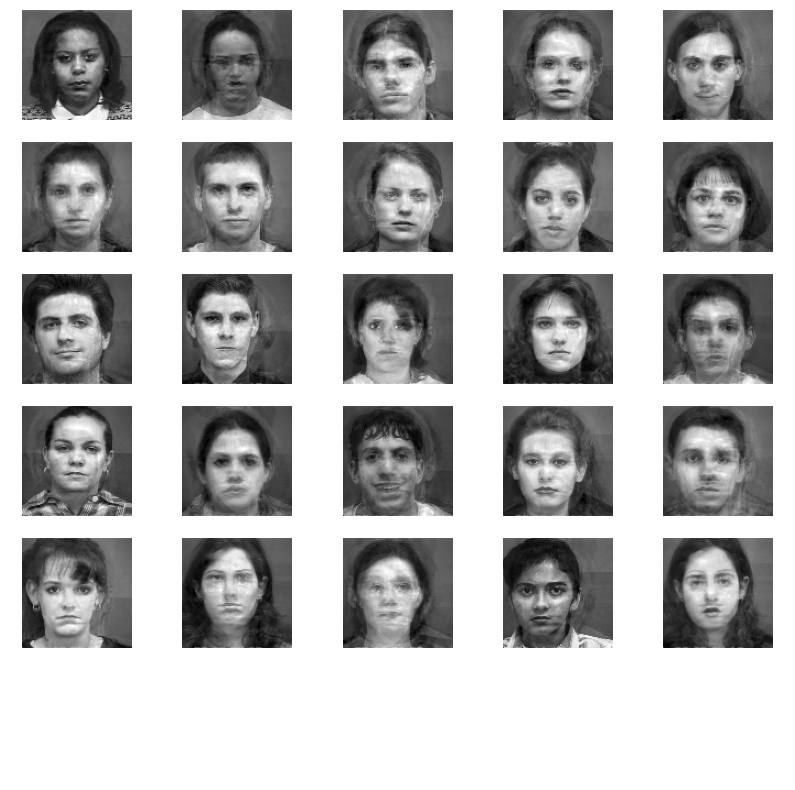

In [16]:

# Project all training images onto k=2, 5, 15 best eigenvalues
k_values = [2,5,15]

projection_results = []

idx = 0
while idx < len(k_values):
    k = k_values[idx]
    projections = np.dot(mean_centered_data, eigenvectors[:k].T)
    projection_results.append(projections)
    idx += 1
    
print("#-------------------------Using Train Images------------------------------#-")
# Display the projected images for k=2, 5, 15 in a 5x5 grid
idx = 0
while idx < len(k_values):
    k = k_values[idx]
    print("#----------------------",k,"---------------------------------#")
    projections = projection_results[idx]
    projection_images = []
    
    j = 0
    while j < len(projections):
        projection = projections[j]
        projection_image = mean_face + np.dot(projection, eigenvectors[:k]).reshape(425, 425)
        projection_images.append(projection_image)
        j += 1
    
    projection_images_resized = resize_images(projection_images)
    display_images(projection_images_resized, 6, 5)
    idx += 1




#-------------------------printing test images in 100,100 res-------------------------------


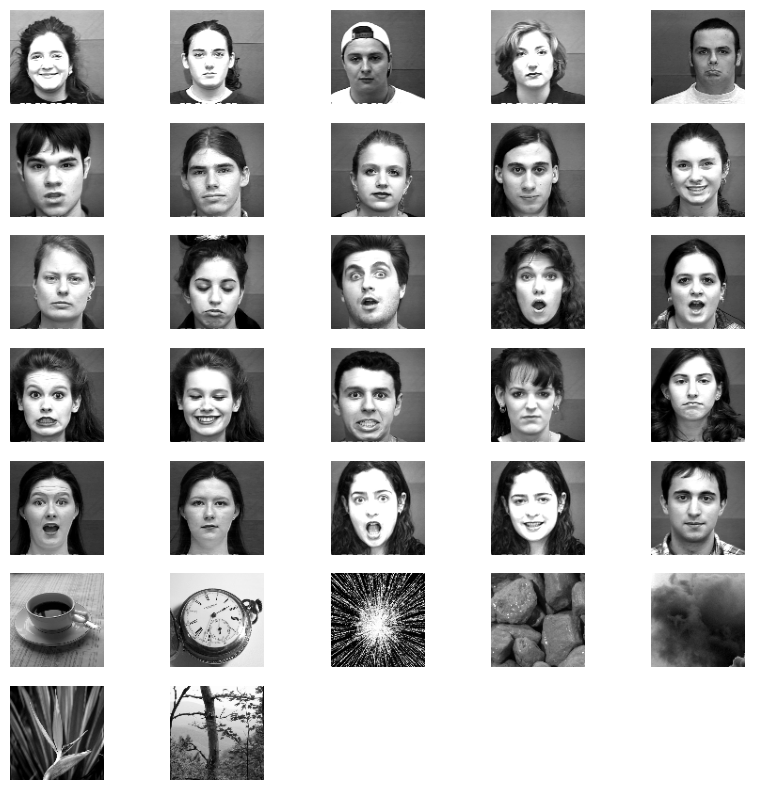

In [17]:
# Now, for testing the images:
test_folder = "Eigenfaces/Test"
test_images = img_folder(test_folder)

print("#-------------------------printing test images in 100,100 res-------------------------------")
display_images(test_images, 7, 5)

### Task3 (40 points)
1. Load all the test images from "/Eigenfaces/Test"
2. Project each image on the k = 2 eigenvectors and find if it's a face. If it's a face, find it's closest training image. Use euclidean distance to calculate distance.
3. Display all the results in an M X 2 table, where M is total no of test images. Each row of the table displays two images. The image on the left is the test image. The image on the right is it's closest image in the eigenfaces space. If an image is classified as a non-face, then the second column in the table should be blank.
4. Repeat the process and display the results for k = 5, k = 15.

#-------------------------Using Test Images-------------------------------
#---------------------K= 2 ---------------------------------#


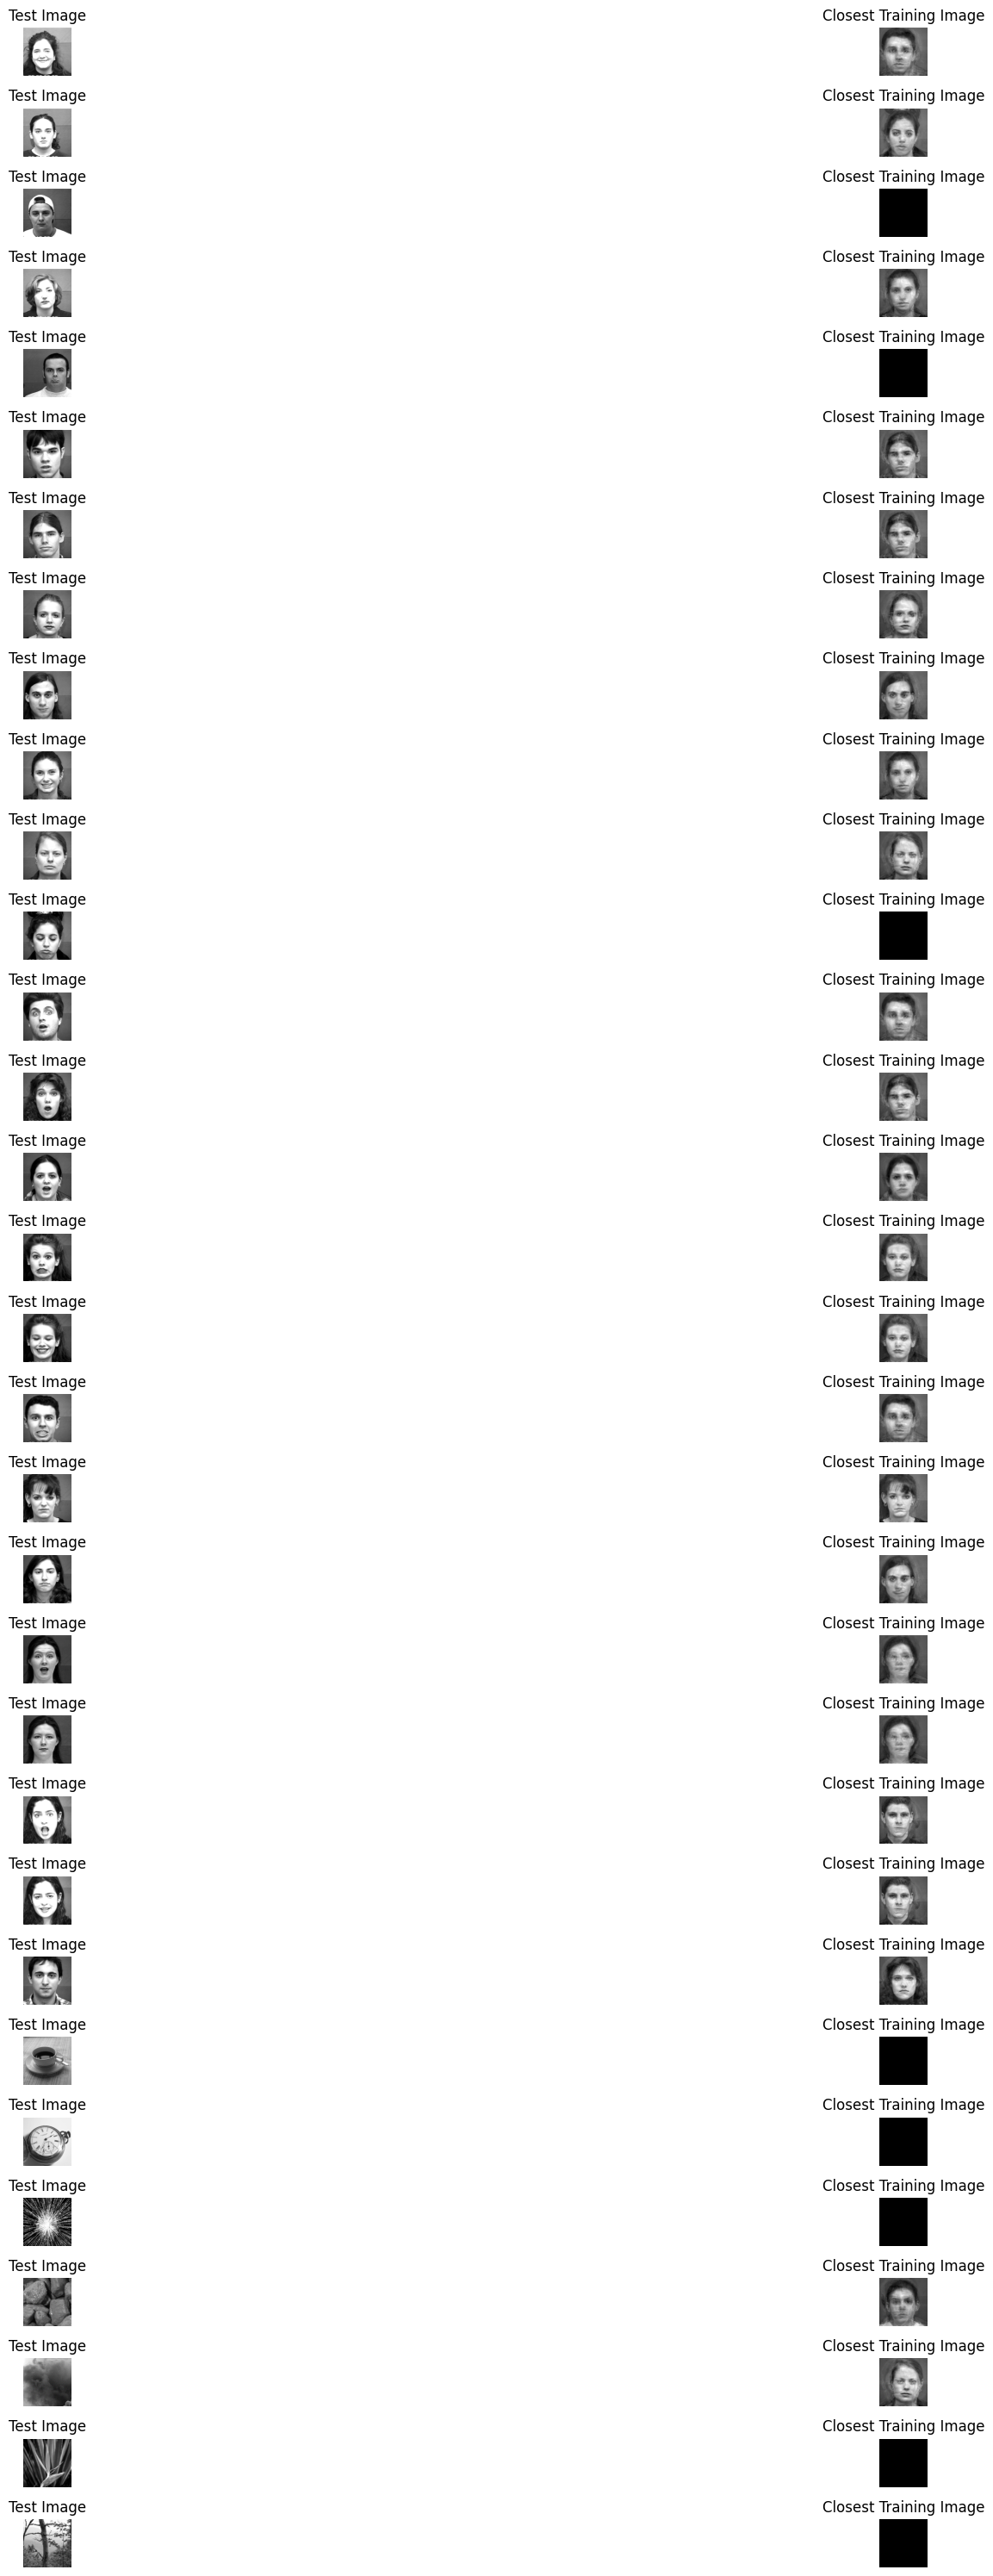

#---------------------K= 5 ---------------------------------#


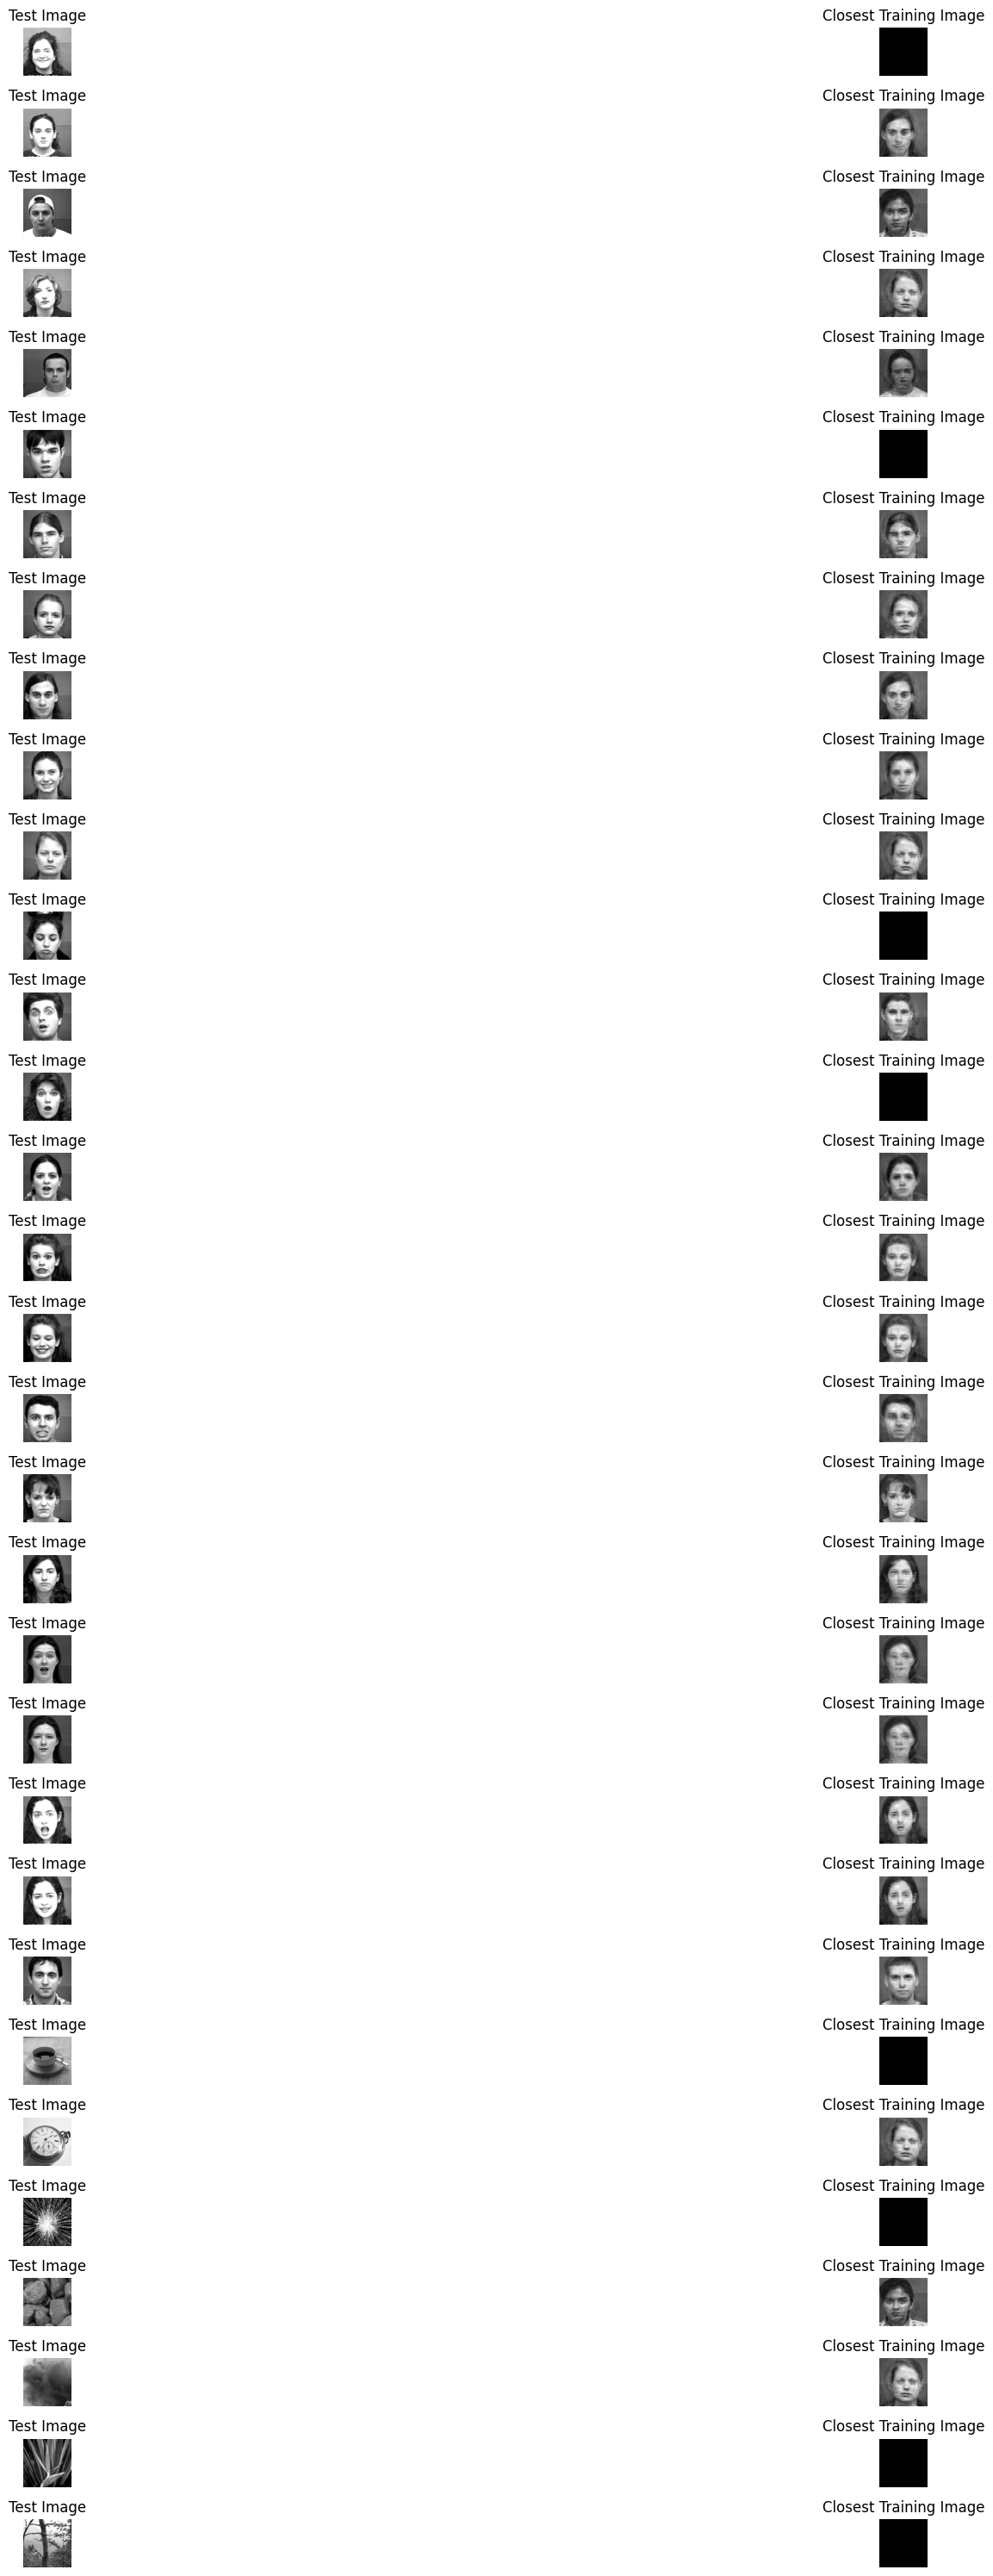

#---------------------K= 15 ---------------------------------#


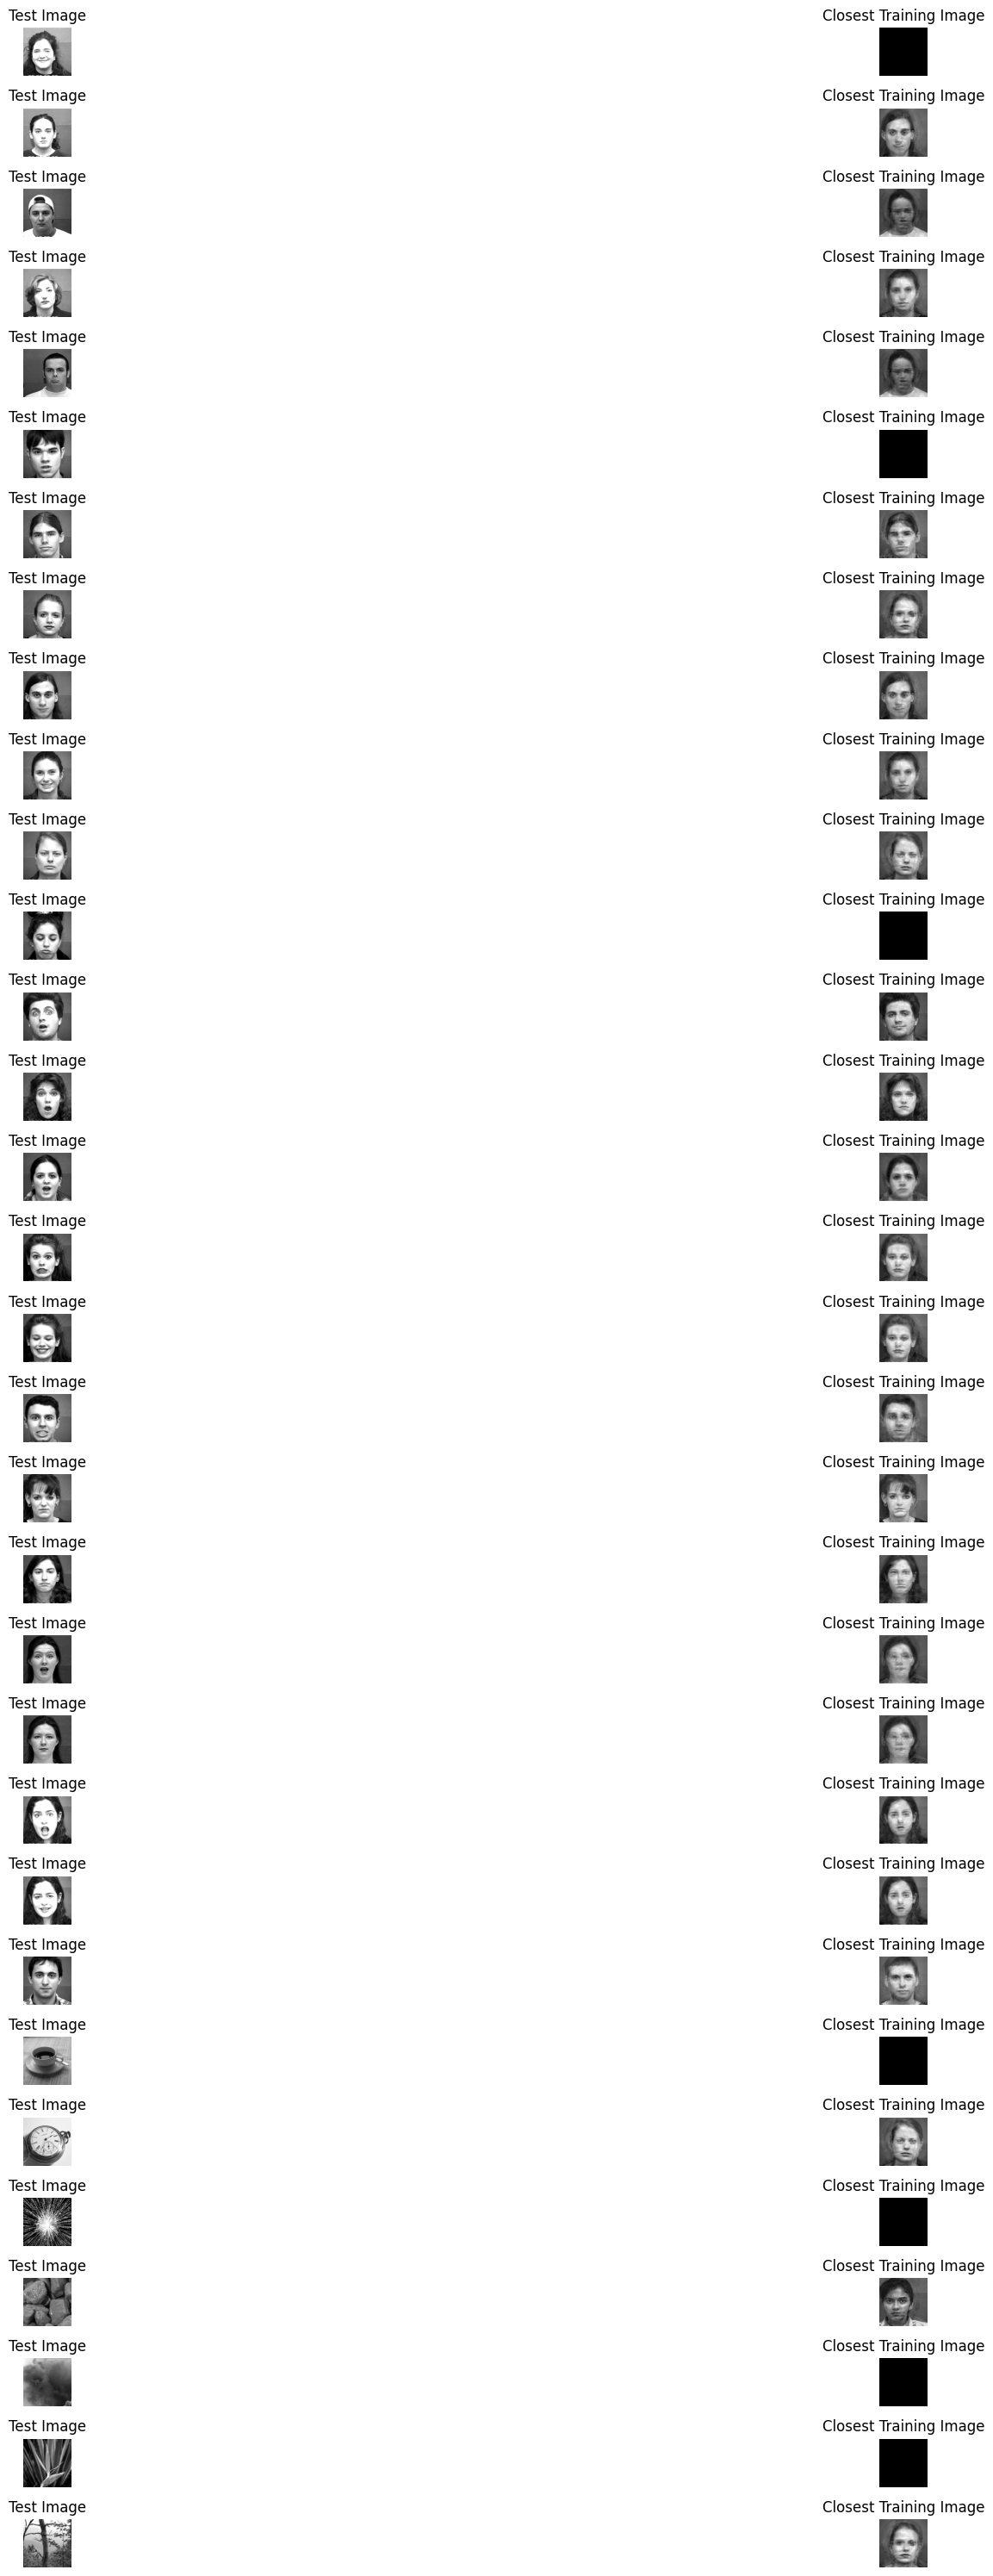

In [20]:

# Convert test images to mean-centered data
test_data_matrix = np.array([img.flatten() - mean_face.flatten() for img in test_images])

print("#-------------------------Using Test Images-------------------------------")

idx = 0
while idx < len(k_values):
    k = k_values[idx]
    print("#---------------------K=",k,"---------------------------------#")
    selected_eigenvectors=eigenvectors[:k].T
    reduced_test_data = np.dot(test_data_matrix, selected_eigenvectors)
    
    l2_norm_thresholds = {
        2: (3000, 6000),
        5: (1900, 3500),
        15: (100.0, 2500)
    }
    l2_norm_threshold1, l2_norm_threshold2 = l2_norm_thresholds[k]

    # Initialize lists to store pairs of test and closest training images
    test_images_list = []
    closest_images_list = []

    i = 0
    while i < reduced_test_data.shape[0]:
        test_image_projection = reduced_test_data[i]
        reconstructed_test_image = np.dot(test_image_projection, selected_eigenvectors.T).reshape(425,425) + mean_face
        l2_norm = (np.linalg.norm(test_data_matrix[i].reshape(425,425) - reconstructed_test_image))%10000
        
        if not (l2_norm >= l2_norm_threshold1 and l2_norm<=l2_norm_threshold2):
            l2_norms = np.linalg.norm(projection_results[idx] - test_image_projection, axis=1)
            closest_training_image_index = np.argmin(l2_norms)
            closest_image = projection_images[closest_training_image_index].reshape(425, 425)
        else:
            closest_image = np.zeros((425,425))  # Add a blank image

        # Append the test and closest training images to the lists
        test_images_list.append(test_data_matrix[i].reshape(425,425))
        closest_images_list.append(closest_image)
        i += 1

    # Display the results
    num_rows = len(test_images_list)
    num_cols = 2

    plt.figure(figsize=(30, 30))
    i = 0
    while i < num_rows:
        plt.subplot(num_rows, num_cols, 2 * i + 1)
        plt.imshow(test_images[i], cmap='gray')
        plt.title('Test Image')
        plt.axis('off')

        plt.subplot(num_rows, num_cols, 2 * i + 2)
        plt.imshow(closest_images_list[i], cmap='gray')
        plt.title('Closest Training Image')
        plt.axis('off')
        i += 1

    plt.tight_layout()
    plt.show()

    idx += 1


#---------------------- 2 ---------------------------------#


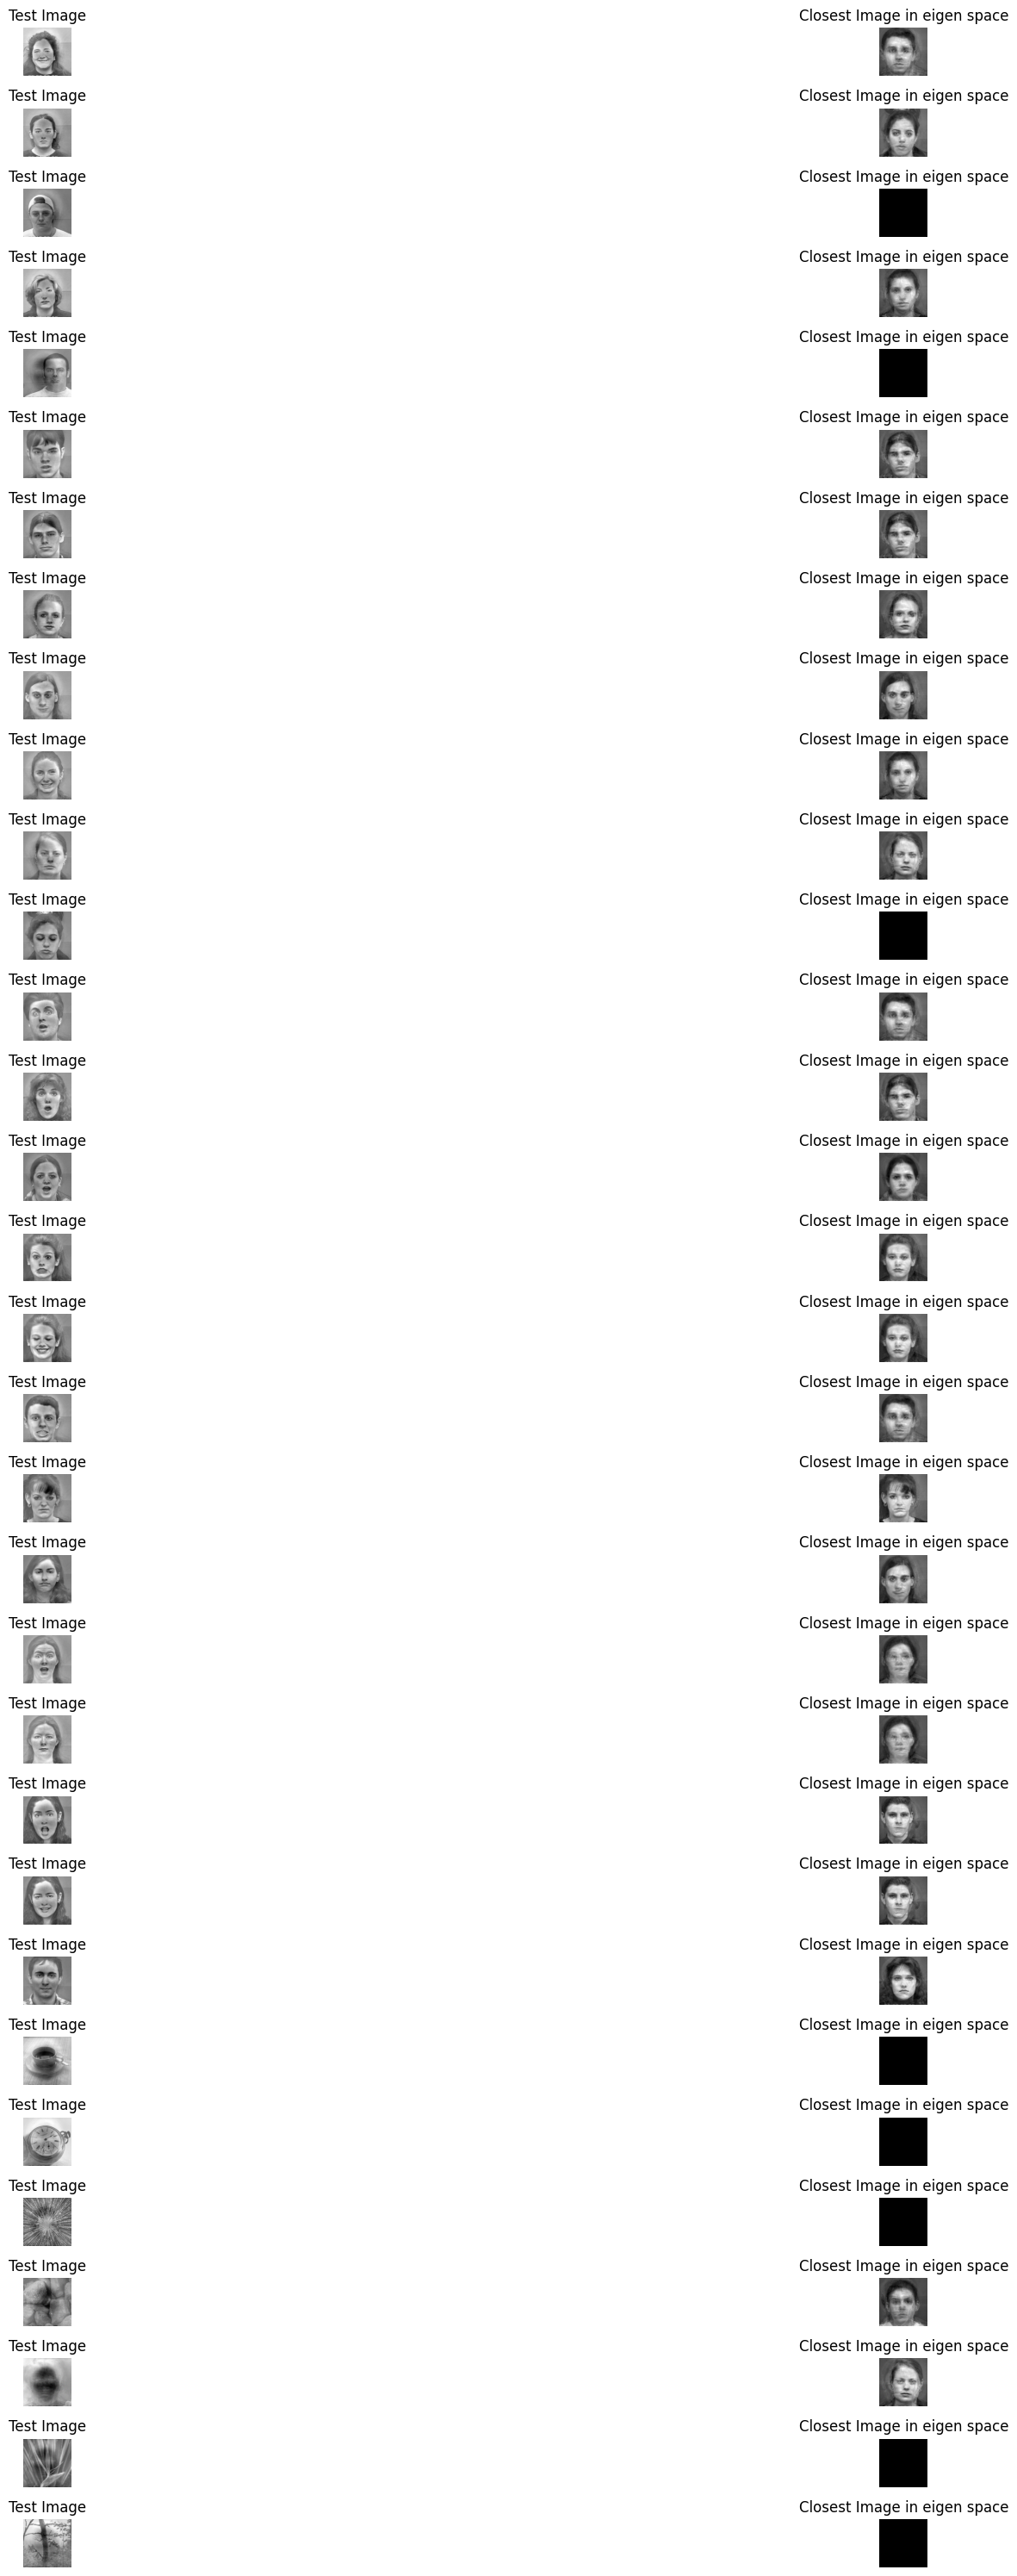

#---------------------- 5 ---------------------------------#


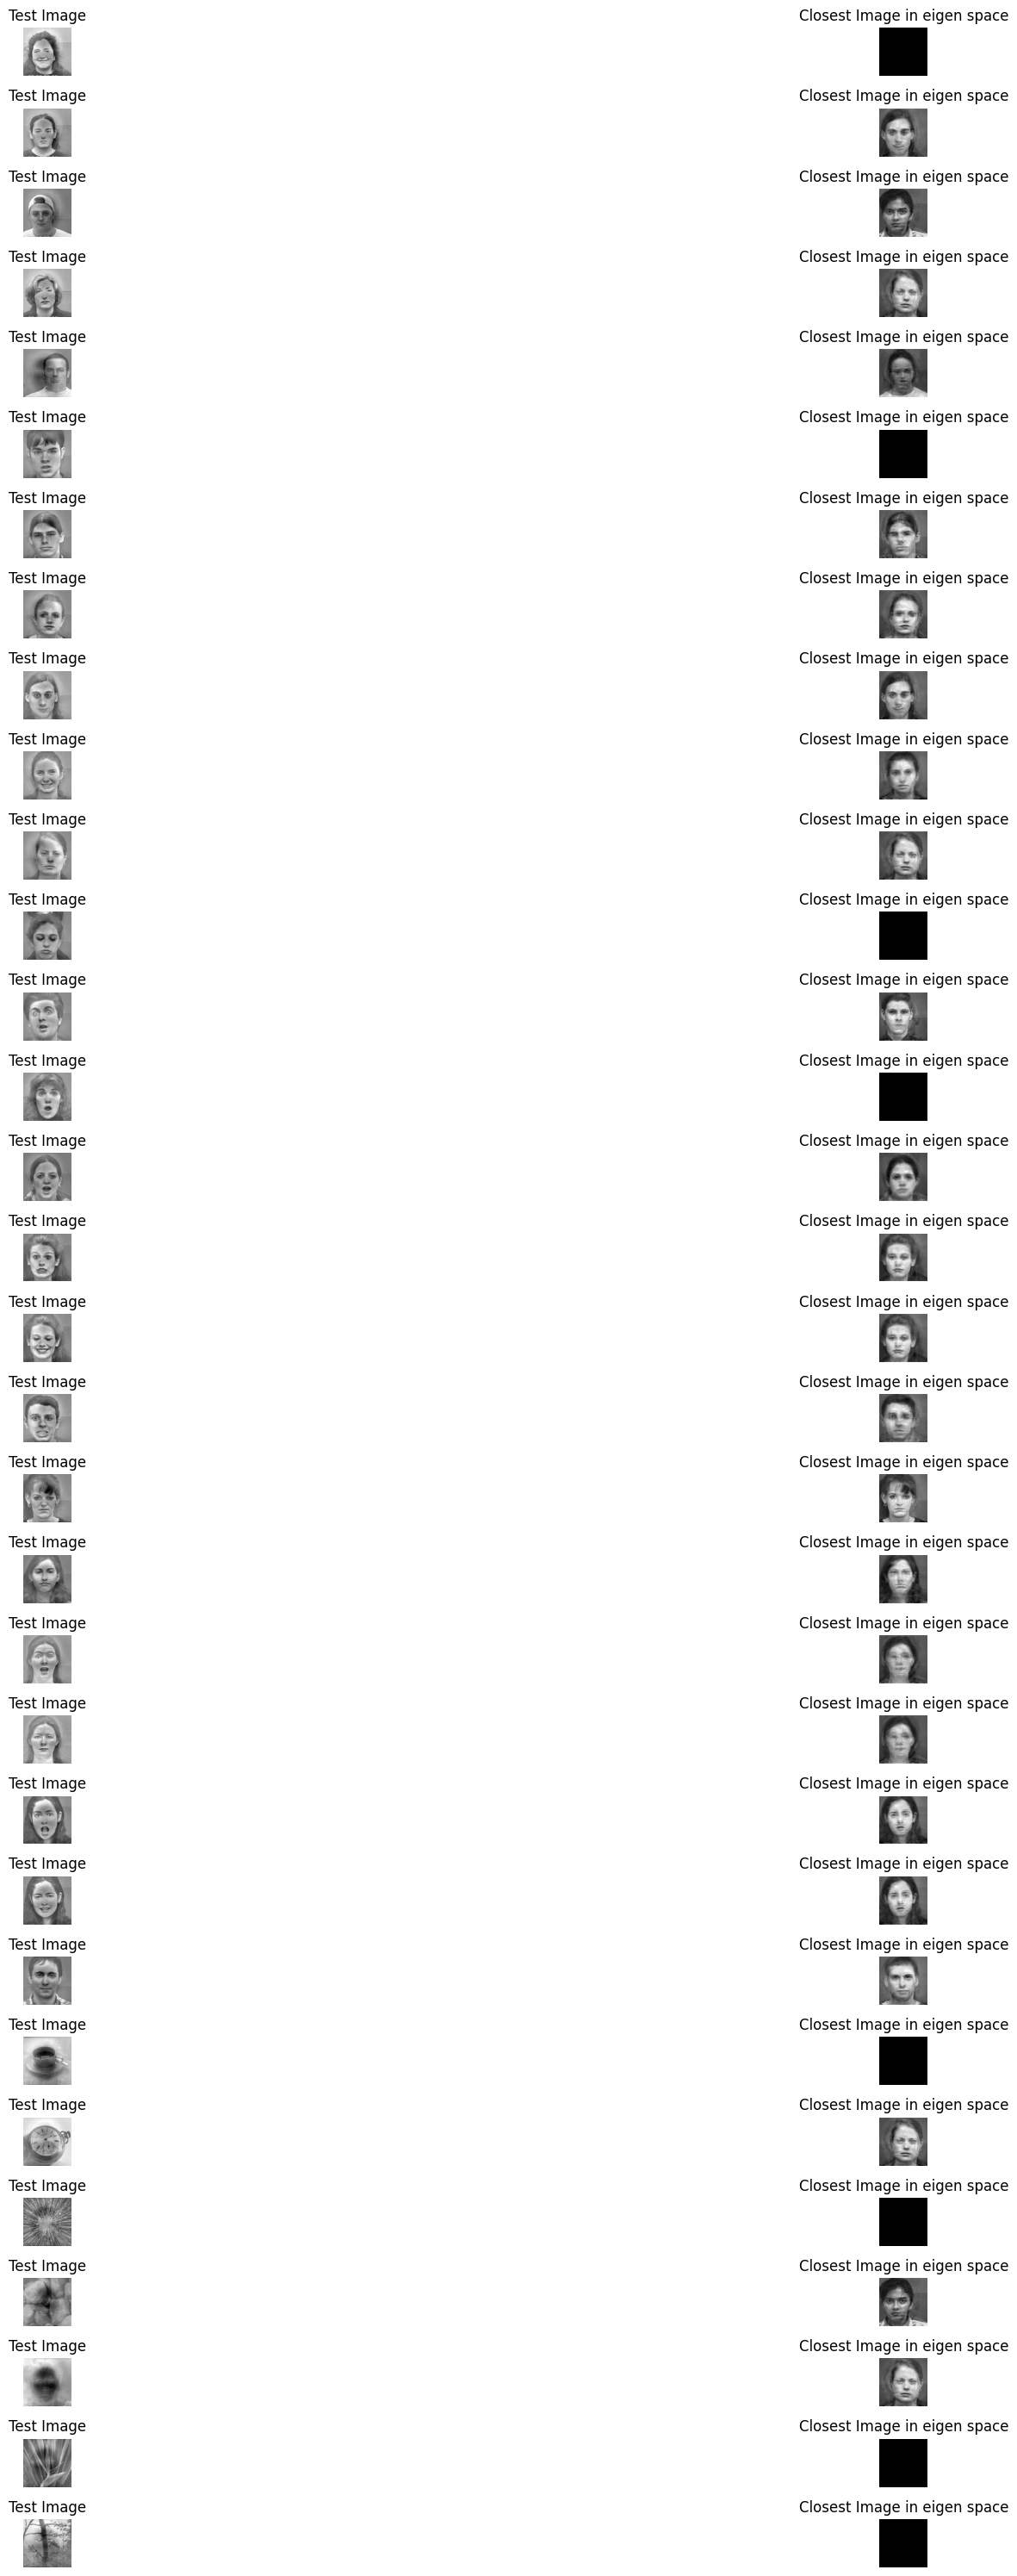

#---------------------- 15 ---------------------------------#


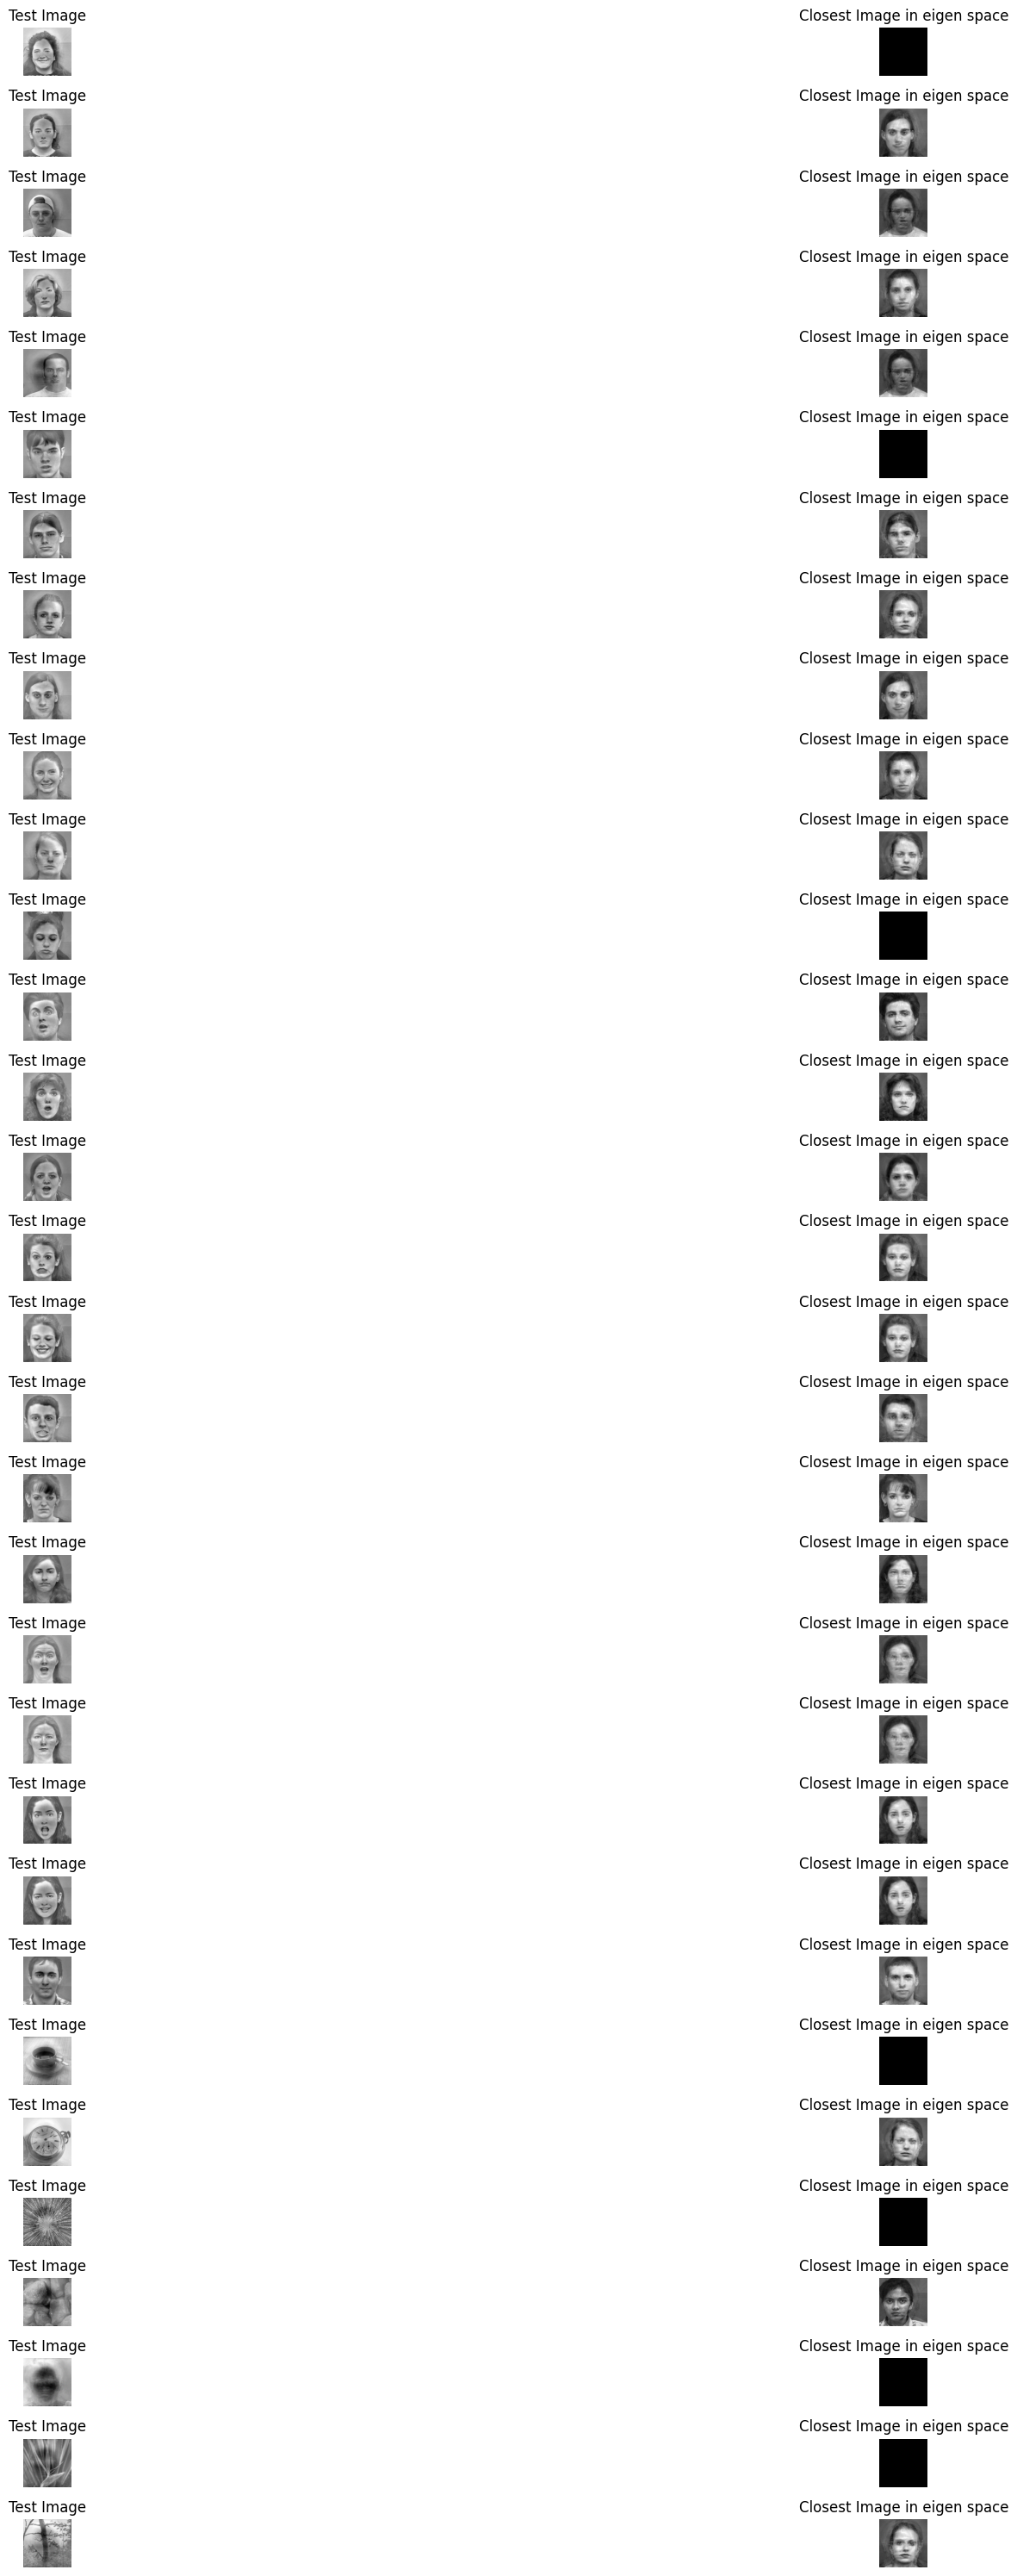

In [21]:
test_folder = "Eigenfaces/Test"
test_images = img_folder(test_folder)

# Convert test images to mean-centered data
test_data_matrix = np.array([img.flatten() - mean_face.flatten() for img in test_images])

k_values = [2, 5, 15]
l2_norm_thresholds = {
    2: (3000, 6000),
    5: (1900, 3500),
    15: (100.0, 2500)
}

for idx, k in enumerate(k_values):
    print("#----------------------", k, "---------------------------------#")
    
    selected_eigenvectors = eigenvectors[:k].T
    reduced_test_data = np.dot(test_data_matrix, selected_eigenvectors)

    l2_norm_threshold1, l2_norm_threshold2 = l2_norm_thresholds[k]

    # Initialize lists to store pairs of test and closest training images
    test_images_list = []
    closest_images_list = []

    for i in range(reduced_test_data.shape[0]):
        test_image_projection = reduced_test_data[i]
        reconstructed_test_image = (np.dot(test_image_projection, selected_eigenvectors.T) + mean_face.flatten()).reshape(425, 425)
        l2_norm = np.linalg.norm(test_data_matrix[i].reshape(425, 425) - reconstructed_test_image) % 10000
        
        if not (l2_norm_threshold1 <= l2_norm <= l2_norm_threshold2):
            projection_matrix = np.array(projection_results[idx])
            l2_norms = np.linalg.norm(projection_matrix - test_image_projection, axis=1)
            closest_training_image_index = np.argmin(l2_norms)
            closest_image = projection_images[closest_training_image_index].reshape(425, 425)
        else:
            closest_image = np.zeros((425, 425))  # Add a blank image

        # Append the test and closest training images to the lists
        test_images_list.append(test_data_matrix[i].reshape(425, 425))
        closest_images_list.append(closest_image)

    # Display the results
    num_rows = len(test_images_list)
    num_cols = 2

    plt.figure(figsize=(30, 30))
    for i in range(num_rows):
        plt.subplot(num_rows, num_cols, 2 * i + 1)
        plt.imshow(test_images_list[i], cmap='gray')
        plt.title('Test Image')
        plt.axis('off')

        plt.subplot(num_rows, num_cols, 2 * i + 2)
        plt.imshow(closest_images_list[i], cmap='gray')
        plt.title('Closest Image in eigen space')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


### Submission Guidelines:
1. Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb
2. Import all the images from the ./Eigenfaces directory. Your TA will use the same directory name to grade your submission.
3. You don't need to attach the dataset with your submission.

Assignment Courtesy: Prof. Farhad Kamangar, CSE@UTA